In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv("BOM_GaugeData_Raw.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.set_index('Date')

In [3]:
Burtundy = df["Burtundy"]
Pooncare = df["Pooncare"]
Bulpunga = df["Bulpunga"]
Tara_Downs = df["Tara Downs"]
Lock_1 = df["Lock 1"]
Morgan = df["Morgan"]

**North-West** (Darling Main Branch)

Main Station: Burtundy

Secondary Station: Pooncare

Correlation method for 254 missing values

In [4]:
combined_nw_main = pd.concat([Burtundy, Pooncare], axis=1)
clean_nw_main = combined_nw_main.dropna()

In [5]:
slope, intercept, r_value, p_value, std_err = linregress(clean_nw_main['Pooncare'], clean_nw_main['Burtundy'])
print(f"R-squared: {r_value**2:.3f}")
print(f"Equation: Burtundy = {slope:.3f} * Pooncare + {intercept:.3f}")

R-squared: 0.988
Equation: Burtundy = 0.972 * Pooncare + 0.043


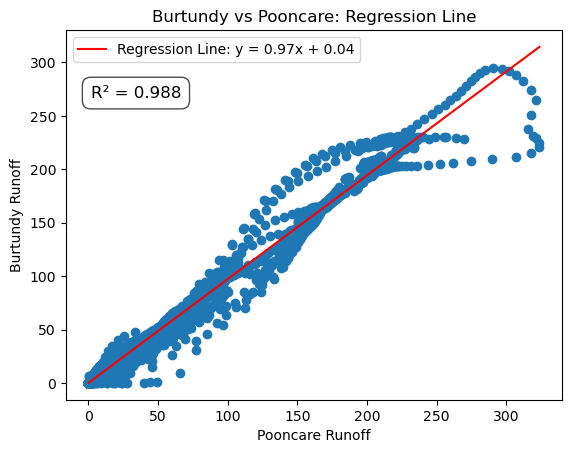

In [6]:
x = clean_nw_main['Pooncare']
y = clean_nw_main['Burtundy']
plt.scatter(x,y)
x_line = np.linspace(x.min(), x.max(), 100) 
y_line = slope * x_line + intercept 
plt.plot(x_line, y_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

r_squared = r_value**2
plt.text(0.05, 0.85, f'R² = {r_squared:.3f}', ha='left', va='top', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('Pooncare Runoff')
plt.ylabel('Burtundy Runoff')
plt.title('Burtundy vs Pooncare: Regression Line')

plt.legend()
plt.show()

In [7]:
mask = (combined_nw_main['Burtundy'].isna() & combined_nw_main['Pooncare'].notna() & (combined_nw_main.index < '2016-01-01'))
combined_nw_main.loc[mask, 'Burtundy'] = slope * combined_nw_main.loc[mask, 'Pooncare'] + intercept

Interpolation method for 17 missing values

In [8]:
index_start = combined_nw_main.index.get_loc("2018-09-02")
index_end = combined_nw_main.index.get_loc("2018-09-20")

In [9]:
Burtundy_before = combined_nw_main['Burtundy'][index_start]
Burtundy_after = combined_nw_main['Burtundy'][index_end]
Pooncare_before = combined_nw_main['Pooncare'][index_start]
Pooncare_after = combined_nw_main['Pooncare'][index_end]
n_missing = index_end - index_start - 1

C:\Users\arfaa\AppData\Local\Temp\ipykernel_20276\3669552253.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Burtundy_before = combined_nw_main['Burtundy'][index_start]
C:\Users\arfaa\AppData\Local\Temp\ipykernel_20276\3669552253.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Burtundy_after = combined_nw_main['Burtundy'][index_end]
C:\Users\arfaa\AppData\Local\Temp\ipykernel_20276\3669552253.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

In [10]:
Pooncare_steps = np.linspace(Pooncare_before, Pooncare_after, n_missing + 2)
percent_decrease = (Pooncare_steps - Pooncare_before) / (Pooncare_after - Pooncare_before)
Burtundy_steps = Burtundy_before + percent_decrease * (Burtundy_after - Burtundy_before)

interpolated_values = Burtundy_steps[1:-1]

interpolated_values

array([0.93927778, 0.89355556, 0.84783333, 0.80211111, 0.75638889,
       0.71066667, 0.66494444, 0.61922222, 0.5735    , 0.52777778,
       0.48205556, 0.43633333, 0.39061111, 0.34488889, 0.29916667,
       0.25344444, 0.20772222])

In [11]:
combined_nw_main.loc[combined_nw_main['Burtundy'].isna(), 'Burtundy'] = interpolated_values

**North-West** (Darling Anabranch)

Main Station: Tara Downs

Secondary Station: Bulpunga

Correlation Method

In [12]:
combined_nw_anabranch = pd.concat([Tara_Downs, Bulpunga], axis=1)
clean_nw_anabranch = combined_nw_anabranch[(combined_nw_anabranch != 0).all(axis=1)].dropna()

In [13]:
slope, intercept, r_value, p_value, std_err = linregress(clean_nw_anabranch['Bulpunga'], clean_nw_anabranch['Tara Downs'])
print(f"R-squared: {r_value**2:.3f}")
print(f"Equation: Tara_Downs = {slope:.3f} * Bulpunga + {intercept:.3f}")

R-squared: 0.989
Equation: Tara_Downs = 0.974 * Bulpunga + -0.084


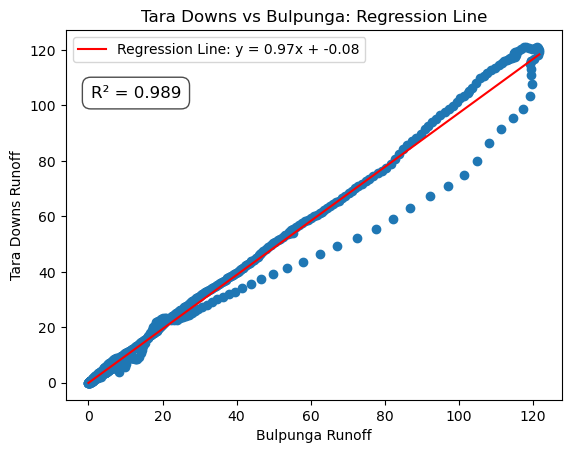

In [14]:
x = clean_nw_anabranch['Bulpunga']
y = clean_nw_anabranch['Tara Downs']
plt.scatter(x,y)
x_line = np.linspace(x.min(), x.max(), 100) 
y_line = slope * x_line + intercept 
plt.plot(x_line, y_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

r_squared = r_value**2
plt.text(0.05, 0.85, f'R² = {r_squared:.3f}', ha='left', va='top', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('Bulpunga Runoff')
plt.ylabel('Tara Downs Runoff')
plt.title('Tara Downs vs Bulpunga: Regression Line')

plt.legend()
plt.show()

In [15]:
mask = combined_nw_anabranch['Tara Downs'].isna() & combined_nw_anabranch['Bulpunga'].notna()
combined_nw_anabranch.loc[mask, 'Tara Downs'] = slope * combined_nw_anabranch.loc[mask, 'Bulpunga'] + intercept
combined_nw_anabranch = combined_nw_anabranch.clip(lower=0)

**South-West**

Main Station: Lock 1

Secondary Station: Morgan

In [16]:
combined_sw = pd.concat([Lock_1, Morgan], axis=1)
clean_sw = combined_sw.dropna()

In [17]:
slope, intercept, r_value, p_value, std_err = linregress(clean_sw['Morgan'], clean_sw['Lock 1'])
print(f"R-squared: {r_value**2:.3f}")
print(f"Equation: Burtundy = {slope:.3f} * Pooncare + {intercept:.3f}")

R-squared: 0.866
Equation: Burtundy = 1.153 * Pooncare + 8.824


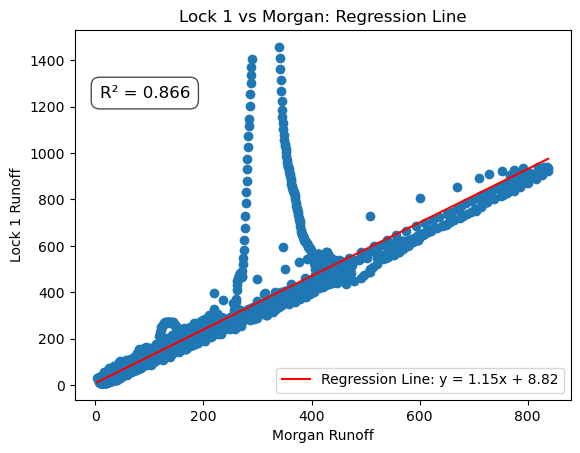

In [18]:
x = clean_sw['Morgan']
y = clean_sw['Lock 1']
plt.scatter(x,y)
x_line = np.linspace(x.min(), x.max(), 100) 
y_line = slope * x_line + intercept 
plt.plot(x_line, y_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

r_squared = r_value**2
plt.text(0.05, 0.85, f'R² = {r_squared:.3f}', ha='left', va='top', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('Morgan Runoff')
plt.ylabel('Lock 1 Runoff')
plt.title('Lock 1 vs Morgan: Regression Line')

plt.legend()
plt.show()

In [19]:
index_start = combined_sw.index.get_loc("2022-12-09")
index_end = combined_sw.index.get_loc("2023-02-08")

In [20]:
Lock1_before = combined_sw['Lock 1'][index_start]
Lock1_after = combined_sw['Lock 1'][index_end]
Morgan_before = combined_sw['Morgan'][index_start]
Morgan_after = combined_sw['Morgan'][index_end]
n_missing = index_end - index_start - 1

C:\Users\arfaa\AppData\Local\Temp\ipykernel_20276\1184294601.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Lock1_before = combined_sw['Lock 1'][index_start]
C:\Users\arfaa\AppData\Local\Temp\ipykernel_20276\1184294601.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Lock1_after = combined_sw['Lock 1'][index_end]
C:\Users\arfaa\AppData\Local\Temp\ipykernel_20276\1184294601.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

In [21]:
Lock1_steps = np.linspace(Lock1_before, Lock1_after, n_missing + 2)
percent_decrease = (Lock1_steps - Lock1_before) / (Lock1_after - Lock1_before)
Morgan_steps = Morgan_before + percent_decrease * (Morgan_after - Morgan_before)

interpolated_values = Lock1_steps[1:-1]

interpolated_values

array([1456.2052623 , 1455.37252459, 1454.53978689, 1453.70704918,
       1452.87431148, 1452.04157377, 1451.20883607, 1450.37609836,
       1449.54336066, 1448.71062295, 1447.87788525, 1447.04514754,
       1446.21240984, 1445.37967213, 1444.54693443, 1443.71419672,
       1442.88145902, 1442.04872131, 1441.21598361, 1440.3832459 ,
       1439.5505082 , 1438.71777049, 1437.88503279, 1437.05229508,
       1436.21955738, 1435.38681967, 1434.55408197, 1433.72134426,
       1432.88860656, 1432.05586885, 1431.22313115, 1430.39039344,
       1429.55765574, 1428.72491803, 1427.89218033, 1427.05944262,
       1426.22670492, 1425.39396721, 1424.56122951, 1423.7284918 ,
       1422.8957541 , 1422.06301639, 1421.23027869, 1420.39754098,
       1419.56480328, 1418.73206557, 1417.89932787, 1417.06659016,
       1416.23385246, 1415.40111475, 1414.56837705, 1413.73563934,
       1412.90290164, 1412.07016393, 1411.23742623, 1410.40468852,
       1409.57195082, 1408.73921311, 1407.90647541, 1407.07373

In [22]:
combined_sw.loc[combined_sw['Lock 1'].isna(), 'Lock 1'] = interpolated_values

In [23]:
new_df = pd.concat([combined_nw_main, combined_nw_anabranch, combined_sw], axis=1)

In [24]:
new_df.to_csv("Processed_Runoff.csv")